In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
customer_df= pd.read_csv('/Users/pedro/Desktop/Ironhack/Unit 04/Labs/lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
customer_df.shape;

In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
customer_df.head();

In [6]:
customer_df.columns = [customer_df.columns[i].lower().replace(' ', '_') for i in range(len(customer_df.columns))]

In [7]:
customer_df.head() #Now in snake_case

customer       state  customer_lifetime_value response  coverage education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  effective_to_date employmentstatus gender  income location_code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4            2/3/11         Employed      M   43836         Rural   

  marital_status  monthly_premium_auto  months_since_last_claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   months_since_policy_inception  number_of_open_complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   number_of_policies     policy_type        policy renew_offer_type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  sales_channel  total_claim_amount  vehicle_class vehicle_size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

# <center> Cleaning Numerical Data

In [8]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

In [9]:
customer_df['renew_offer_type'] = customer_df['renew_offer_type'].map({'Offer1':1, 'Offer2':2, 'Offer3':3, 'Offer4':4})
customer_df['renew_offer_type'] = customer_df['renew_offer_type'].astype(int)

In [10]:
customer_df

customer       state  customer_lifetime_value response  coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     education effective_to_date employmentstatus gender  income  \
0     Bachelor        2011-02-24         Employed      F   56274   
1     Bachelor        2011-01-31       Unemployed      F       0   
2     Bachelor        2011-02-19         Employed      F   48767   
3     Bachelor        2011-01-20       Unemployed      M       0   
4     Bachelor        2011-02-03         Employed      M   43836   
...        ...               ...              ...    ...     ...   
9129  Bachelor        2011-02-10         Employed      M   71941   
9130   College        2011-02-12         Employed      F   21604   
9131  Bachelor        2011-02-06       Unemployed      M       0   
9132   College        2011-02-03         Employed      M   21941   
9133   College        2011-02-14       Unemployed      M       0   

     location_code marital_status  monthly_premium_auto  \
0         Suburban        Married                    69   
1         Suburban         Single                    94   
2         Suburban        Married                   108   
3         Suburban        Married                   106   
4            Rural         Single                    73   
...            ...            ...                   ...   
9129         Urban        Married                    73   
9130      Suburban       Divorced                    79   
9131      Suburban         Single                    85   
9132      Suburban        Married                    96   
9133      Suburban         Single                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      number_of_open_complaints  number_of_policies     policy_type  \
0                             0                   1  Corporate Auto   
1                             0                   8   Personal Auto   
2                             0                   2   Personal Auto   
3                             0                   7  Corporate Auto   
4                             0                   1   Personal Auto   
...                         ...                 ...             ...   
9129                          0                   2   Personal Auto   
9130                          0                   1  Corporate Auto   
9131                          3                   2  Corporate Auto   
9132                          0                   3   Personal Auto   
9133                          0                   1 

In [11]:
corr = customer_df.corr()

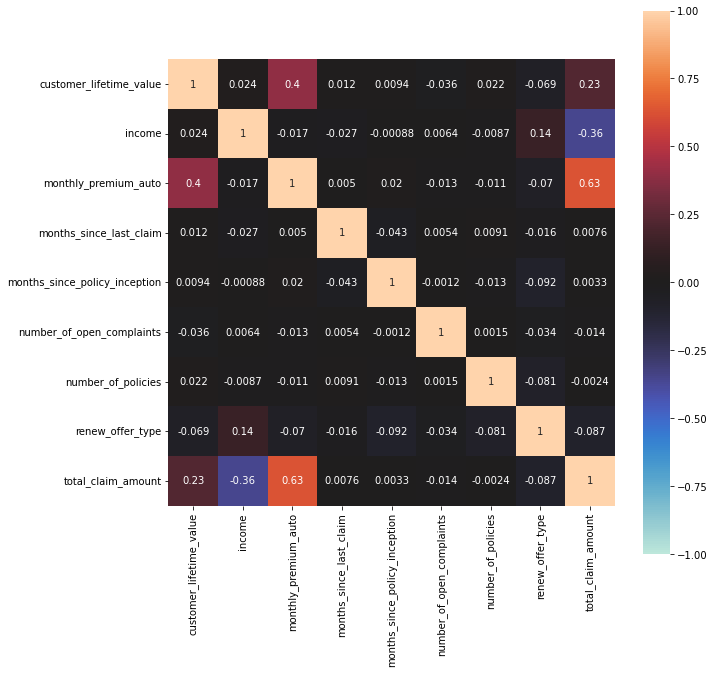

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    square=True,
    annot=True
)

This heatmap shows us that only few pairs of data have significant correlation
Dark cells have no to very little correlation, the cold tones represent negative correlations 
and worm tones positive correlations

In [13]:
num = customer_df.select_dtypes('number')

In [14]:
num

customer_lifetime_value  income  monthly_premium_auto  \
0                 2763.519279   56274                    69   
1                 6979.535903       0                    94   
2                12887.431650   48767                   108   
3                 7645.861827       0                   106   
4                 2813.692575   43836                    73   
...                       ...     ...                   ...   
9129             23405.987980   71941                    73   
9130              3096.511217   21604                    79   
9131              8163.890428       0                    85   
9132              7524.442436   21941                    96   
9133              2611.836866       0                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      number_of_open_complaints  number_of_policies  renew_offer_type  \
0                             0                   1                 1   
1                             0                   8                 3   
2                             0                   2                 1   
3                             0                   7                 1   
4                             0                   1                 1   
...                         ...                 ...               ...   
9129                          0                   2                 2   
9130                          0                   1                 1   
9131                          3                   2                 1   
9132                          0                   3                 3   
9133                          0                   1                 4   

      total_claim_amount  
0             384.811147  
1            1131.464935  
2             566.472247  
3             529.881344  
4             138.130879  
...                  ...  
9129          198.234764  
9130          379.200000  
9131          790.784983  
9132          691.200000  
9133          369.600000  

[9134 rows x 9 columns]

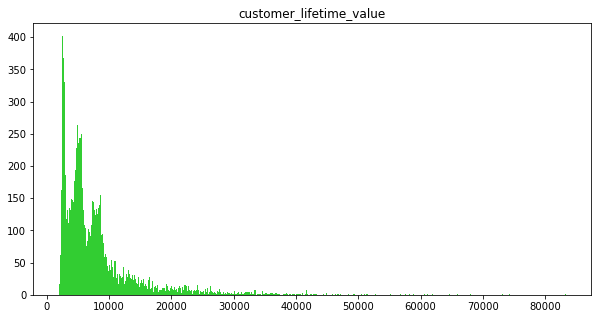

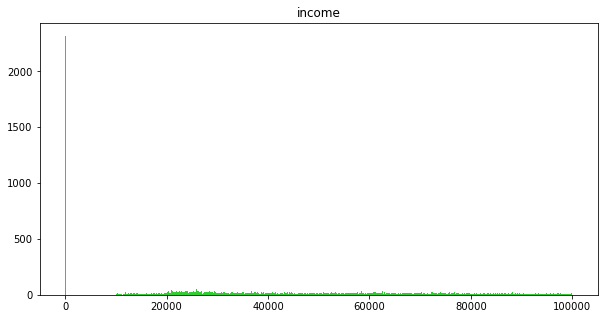

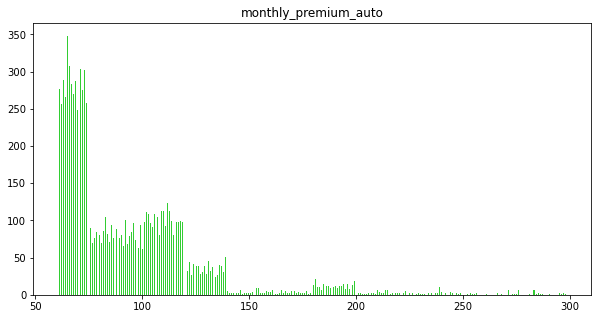

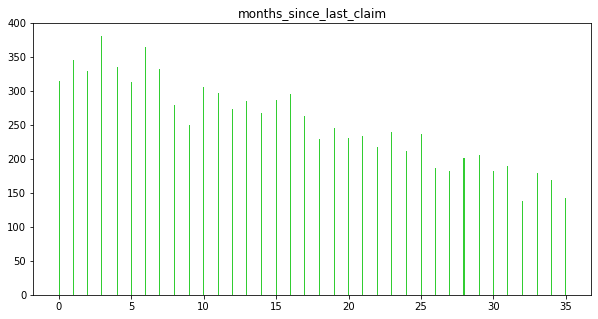

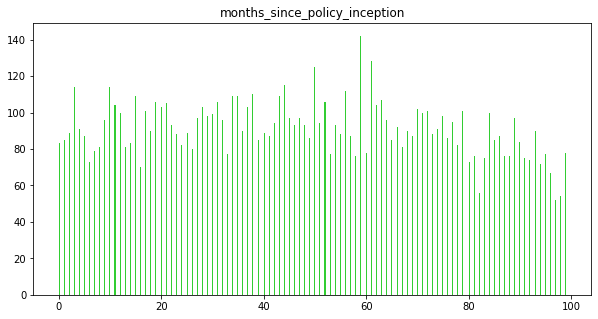

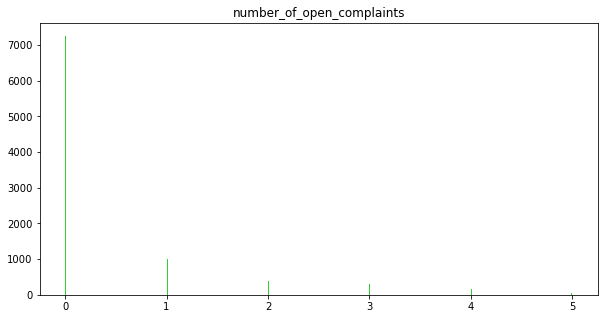

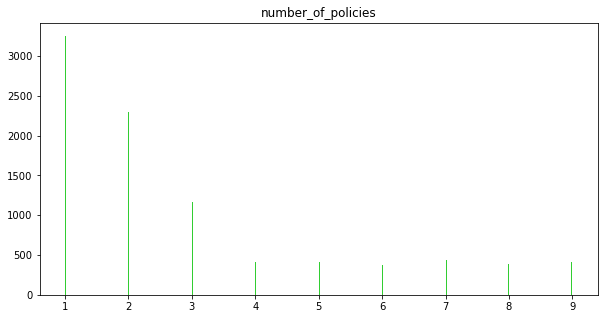

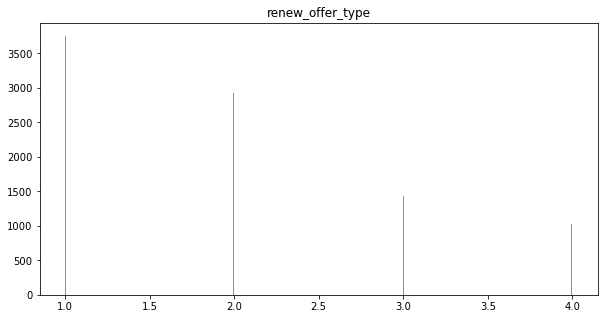

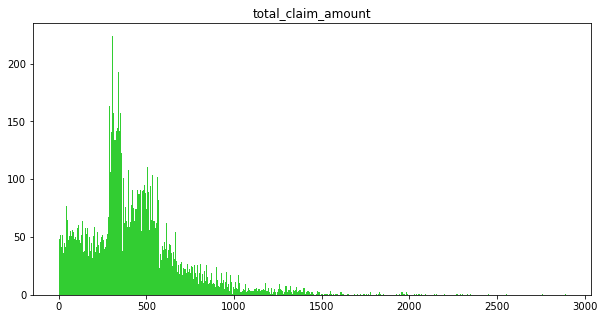

In [64]:
for column in num.columns:
    plt.title(column)
    plt.hist(data=num, x=column,bins=500, color='limegreen')
    plt.show()

some graphs have high density in certain values like in 'income'. 
(Only) the customers that are unemployed, have an income of 0. But they're still a lot.
This compresses the graph on the y axis and makes it impossible to see the curve of density per income.
Similiarly, this happens in the number_of_complaints. 

In the graph month_since_policy_inception we have the data condensed in packages.
around the values 20, 60 and 100 mostly.
Similiarly, this happens in the number_of_policies. 

In [16]:
cat=customer_df.select_dtypes('object')
del cat['customer']

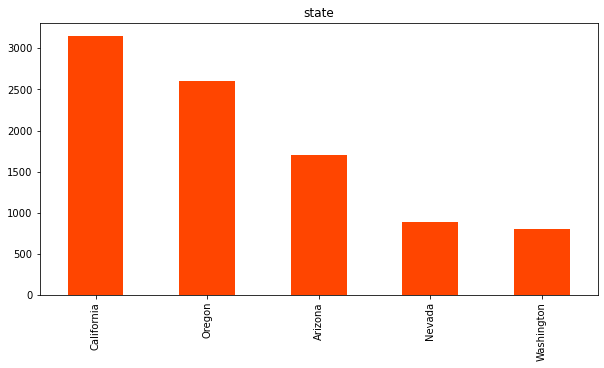

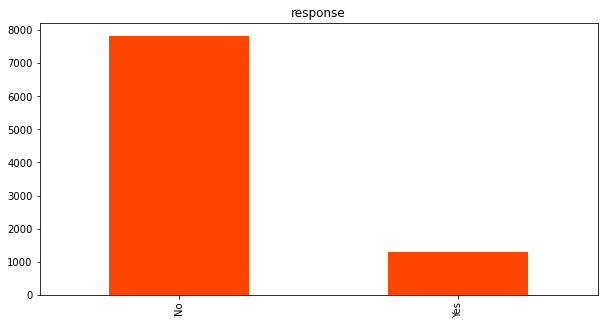

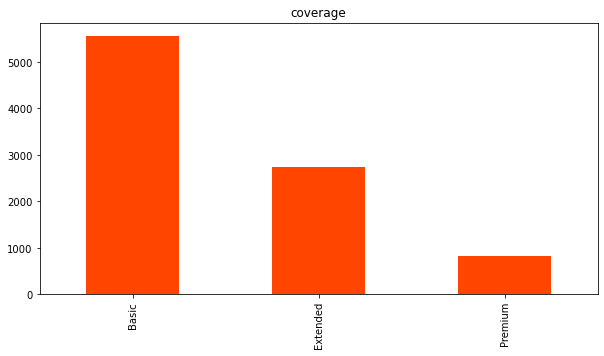

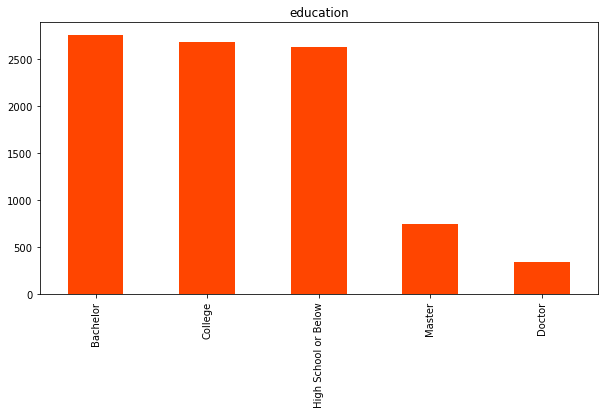

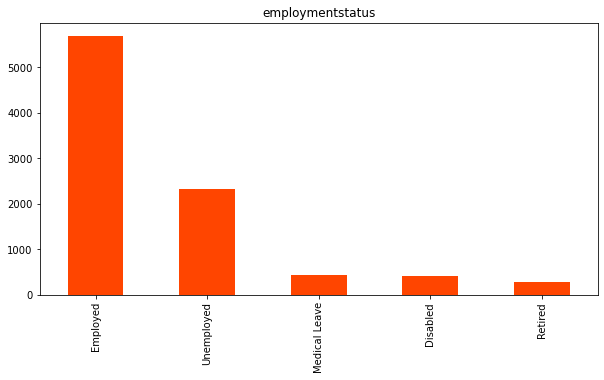

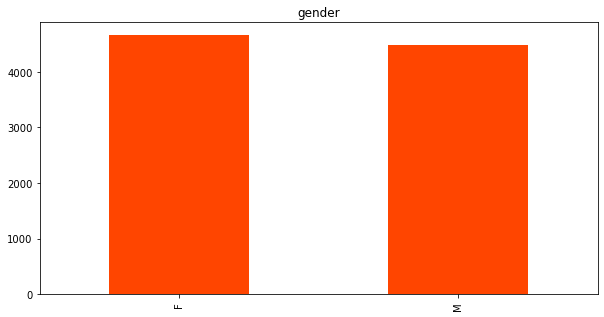

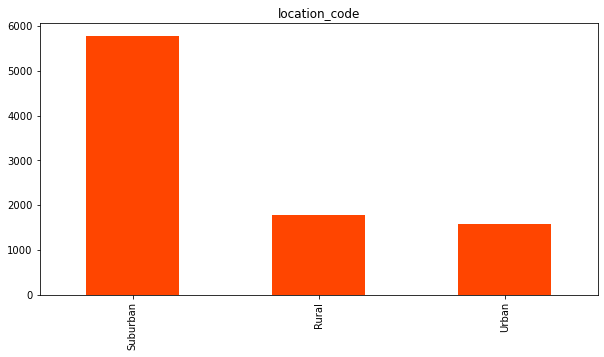

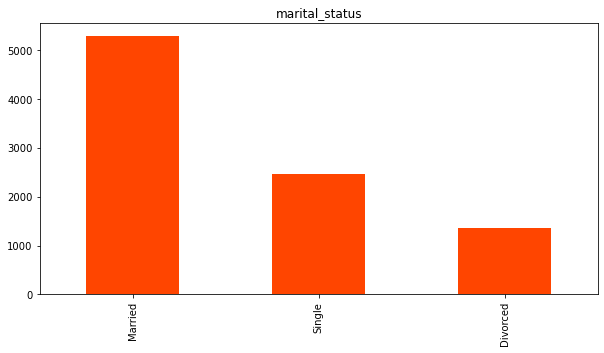

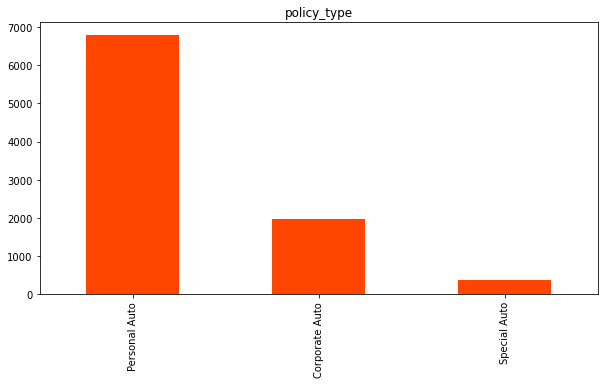

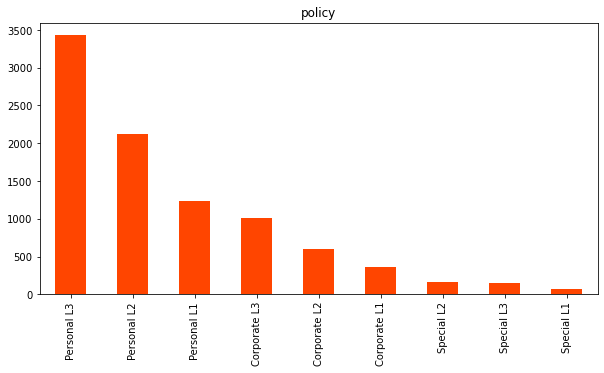

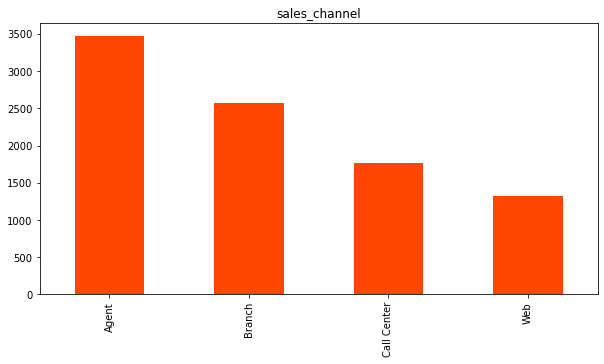

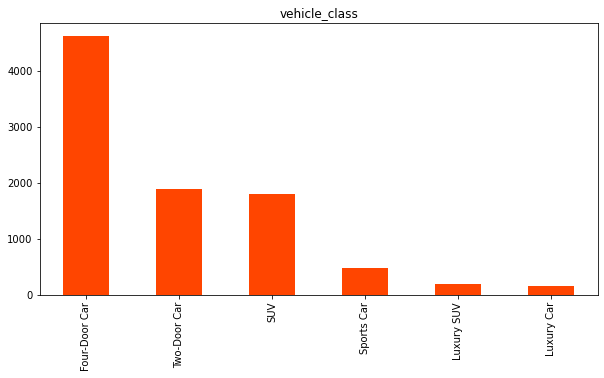

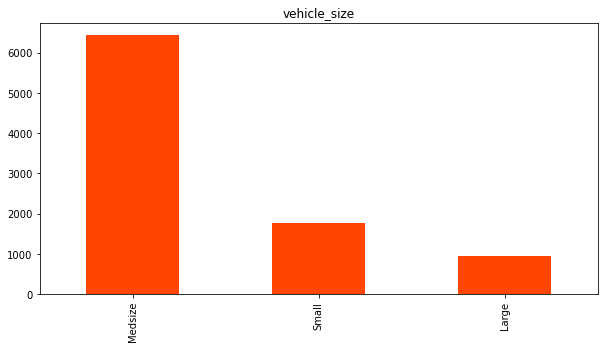

In [67]:
for column in cat:
    plt.title(column)
    cat[column].value_counts().plot(kind='bar',color='orangered')
    plt.show()

We can see that the plot of 'customer' is a total mess (and take forever to process).
This plot is irrelavent since it's only ploting the density of a customer ID.
The density is always 1 for all the values and don't give us any information,
since there's only one ID per customer.

# Checking for Outliers

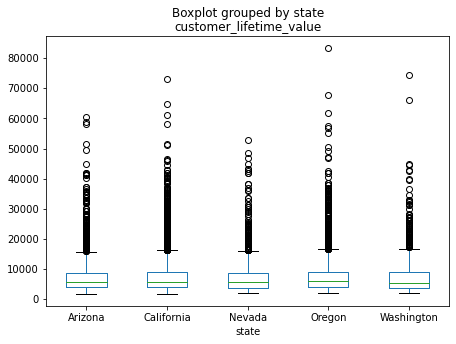

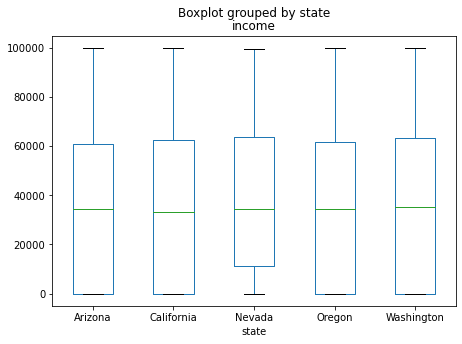

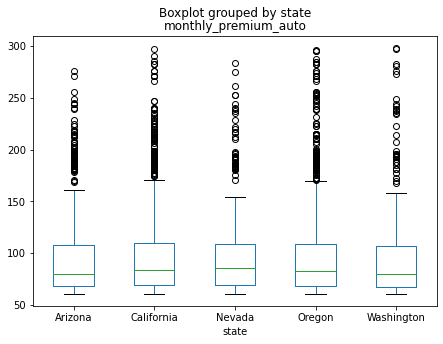

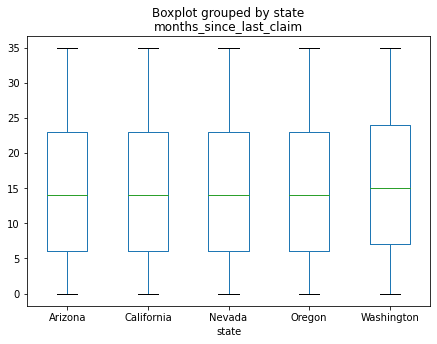

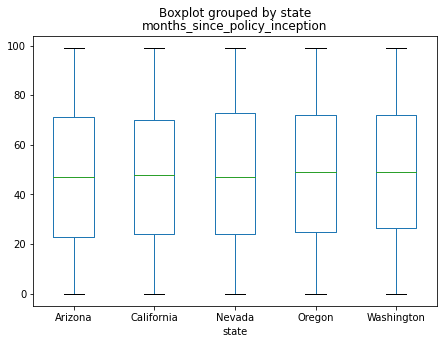

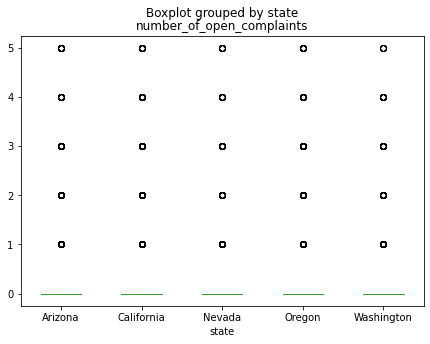

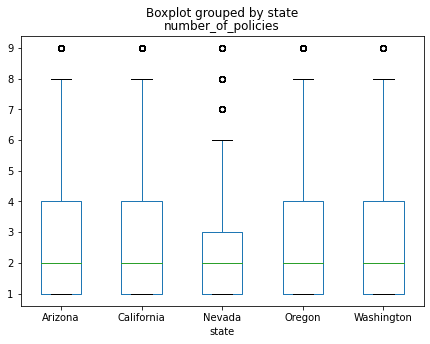

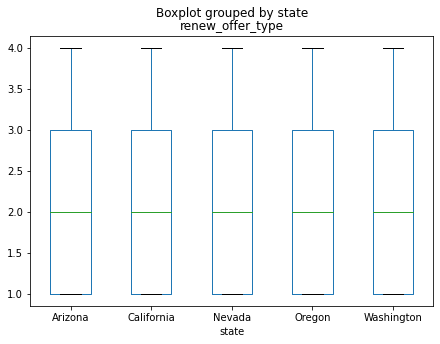

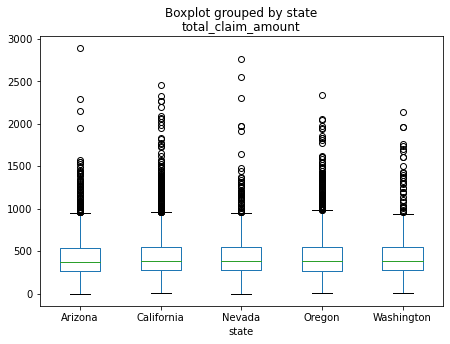

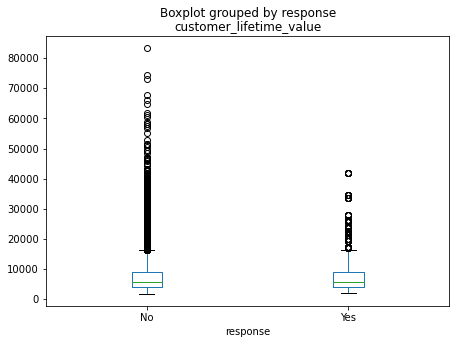

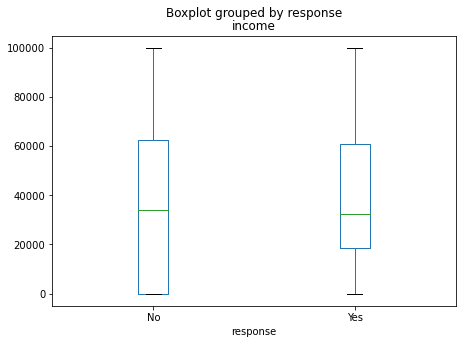

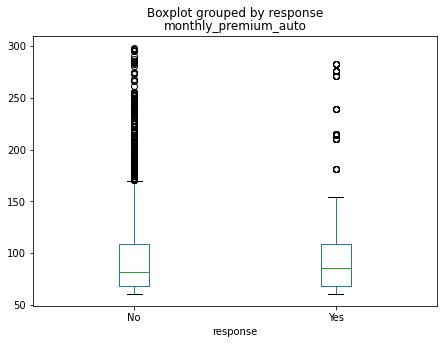

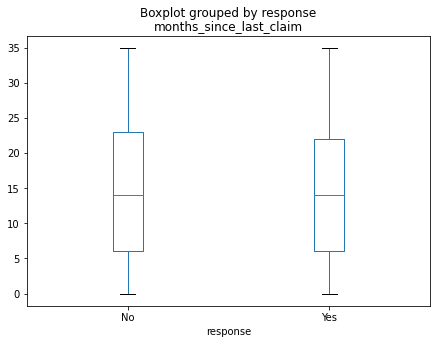

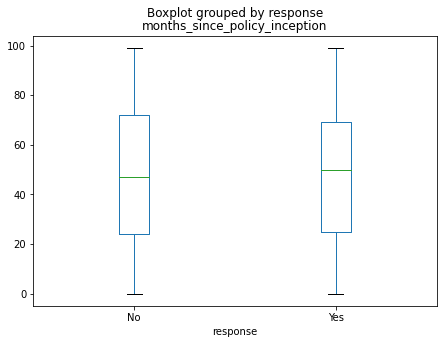

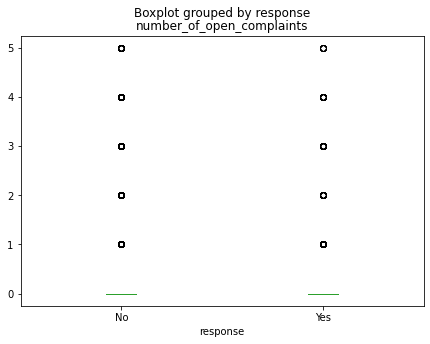

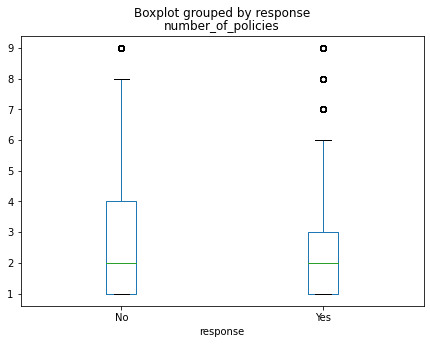

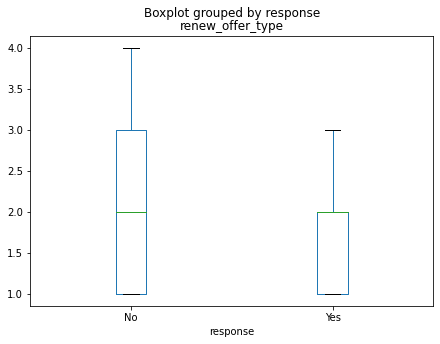

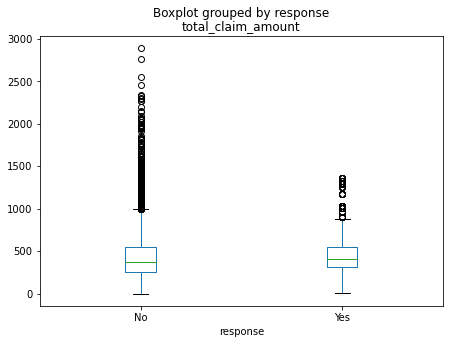

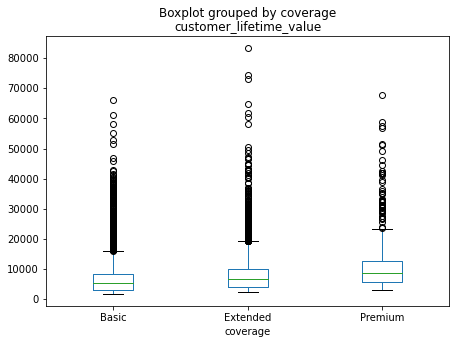

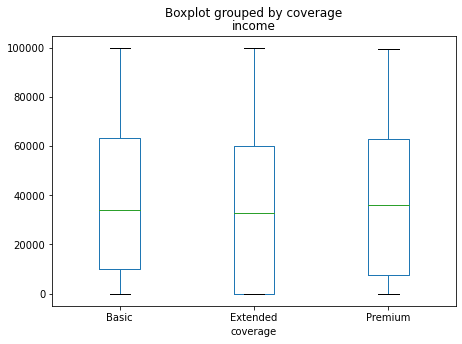

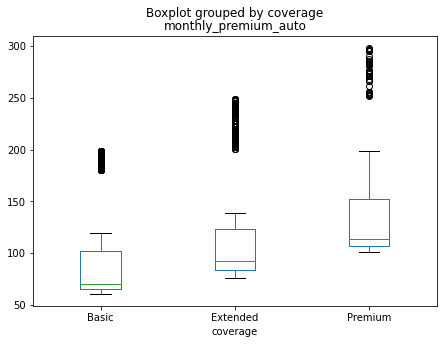

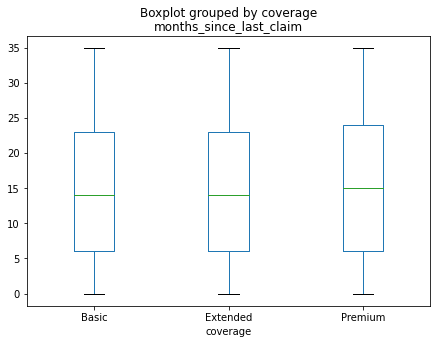

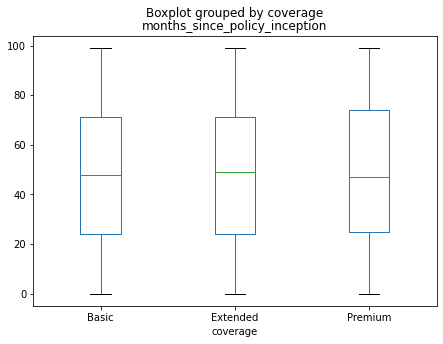

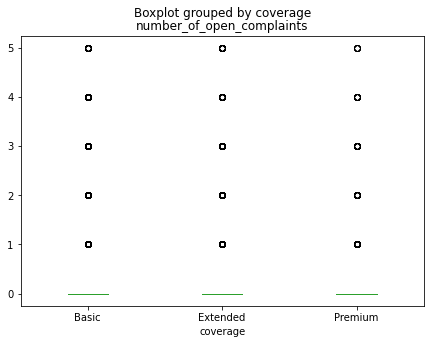

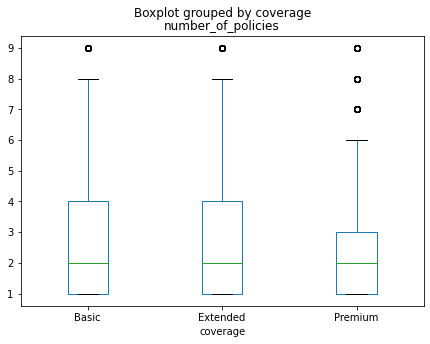

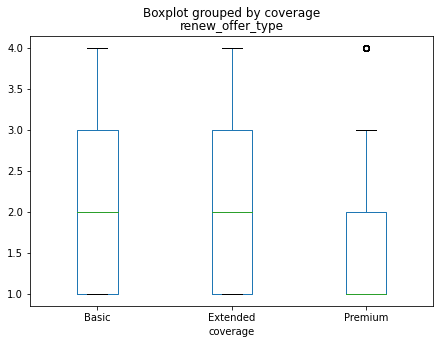

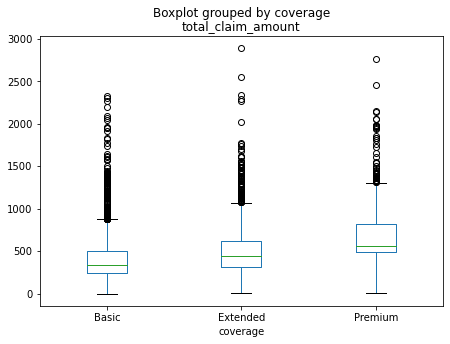

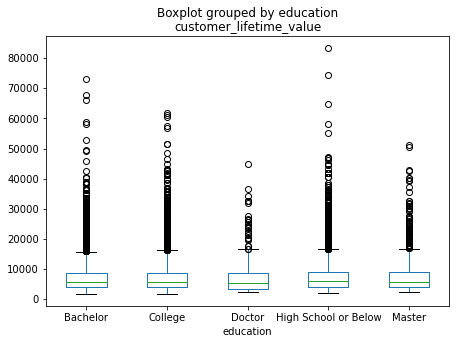

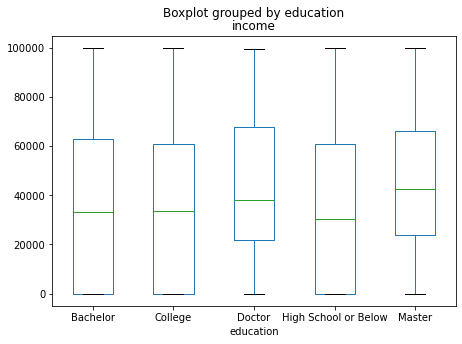

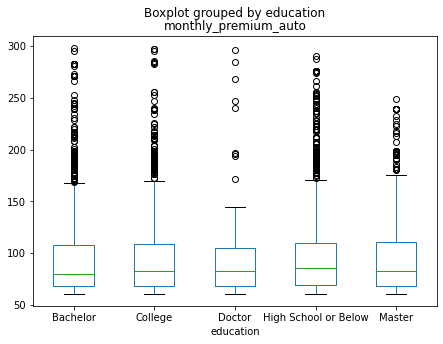

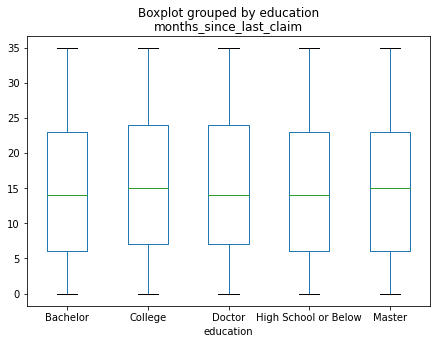

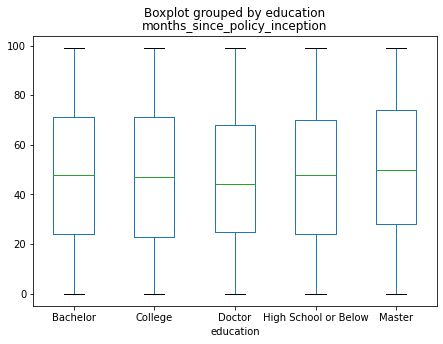

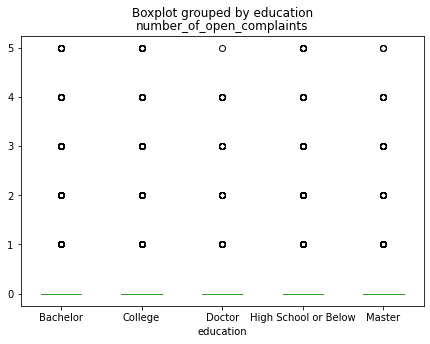

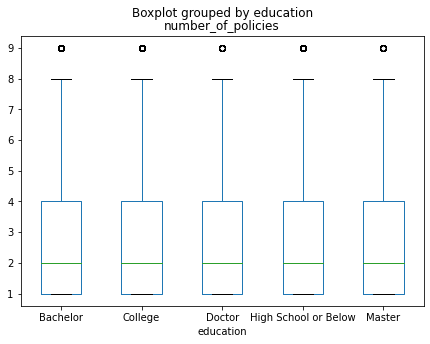

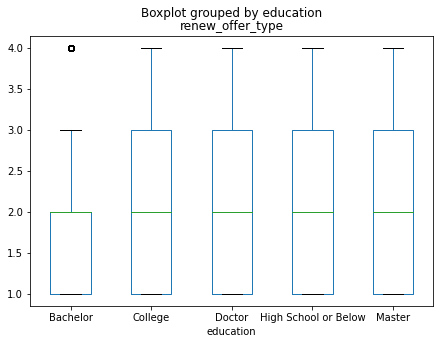

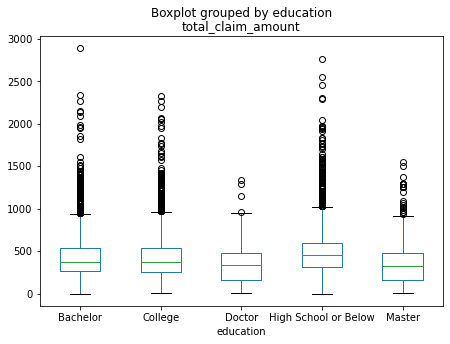

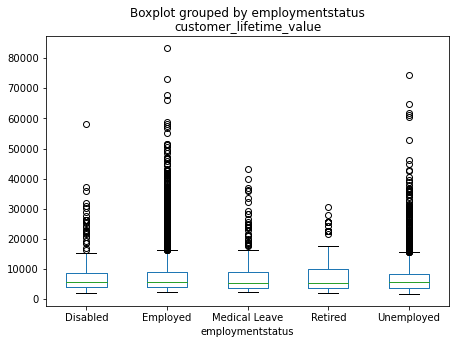

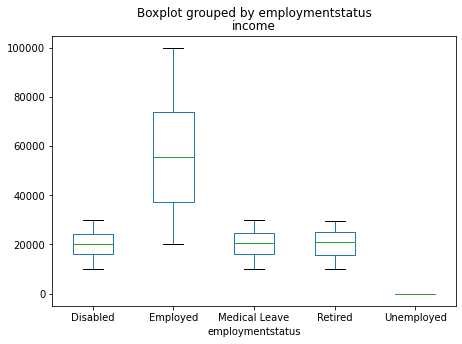

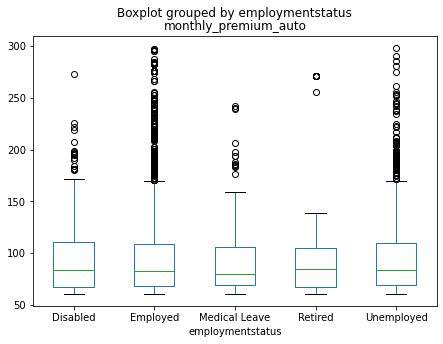

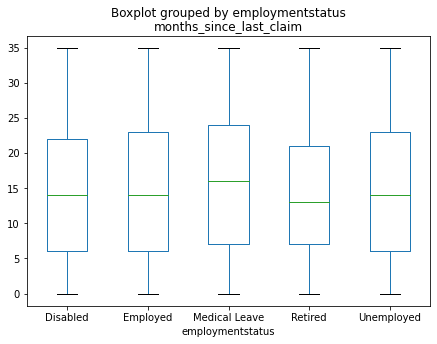

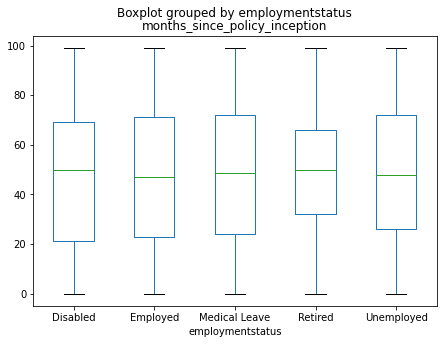

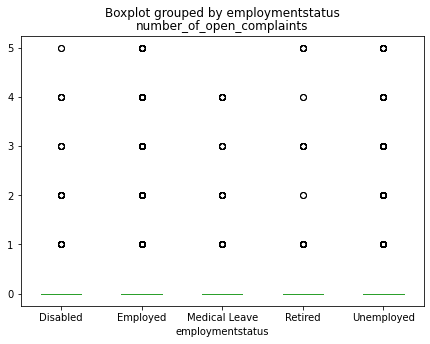

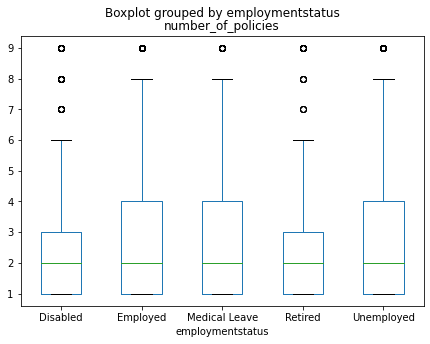

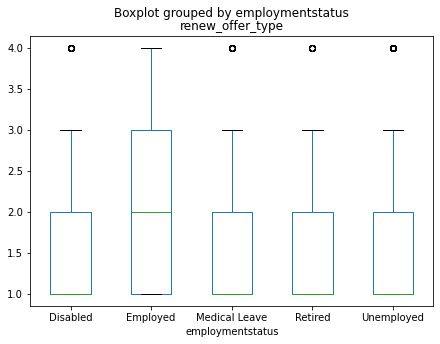

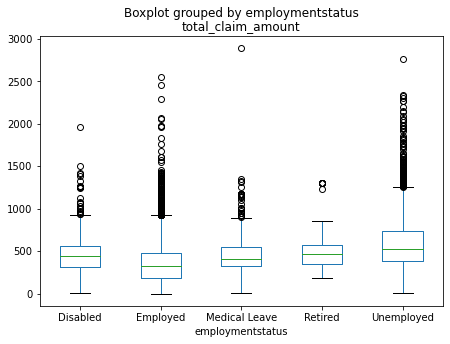

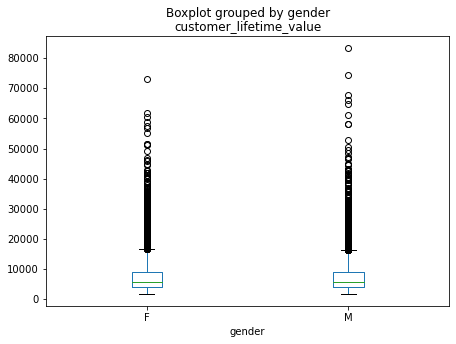

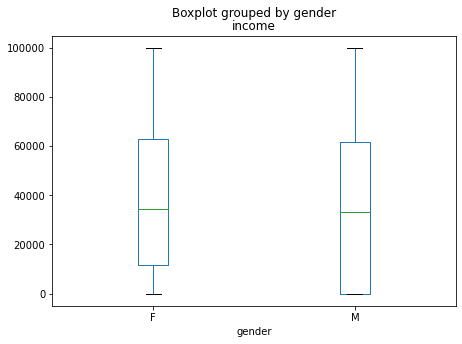

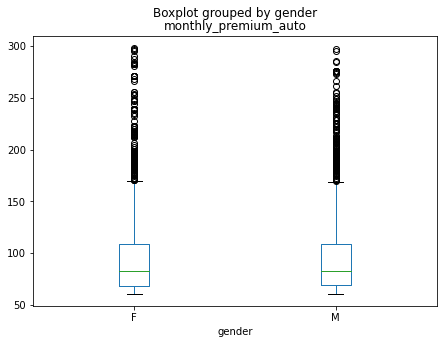

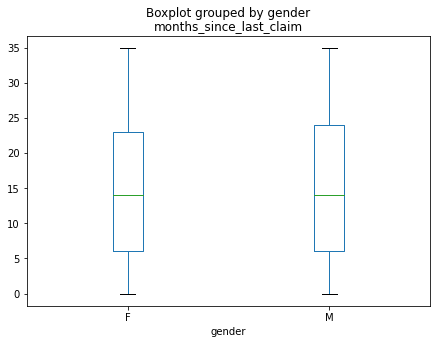

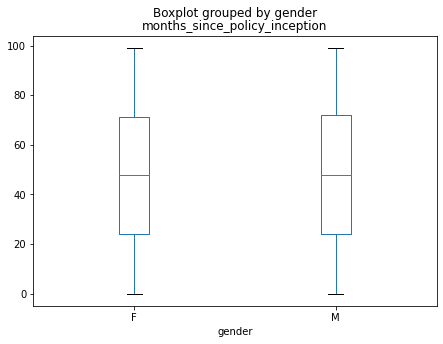

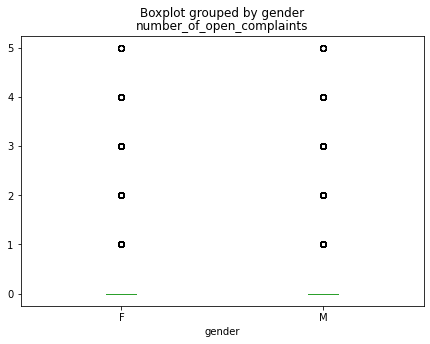

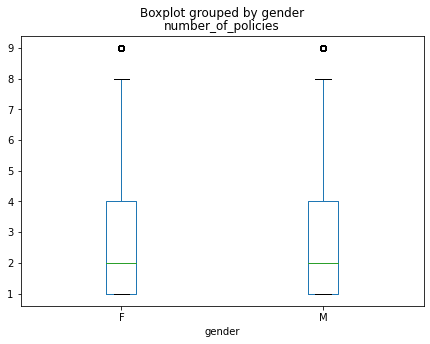

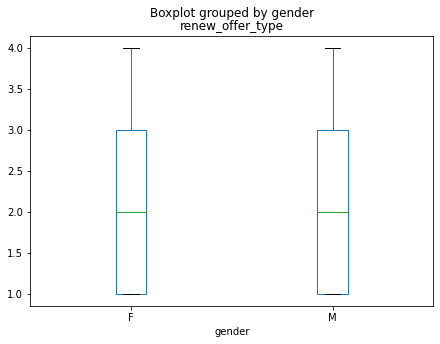

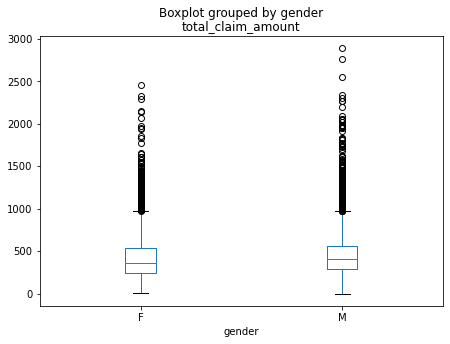

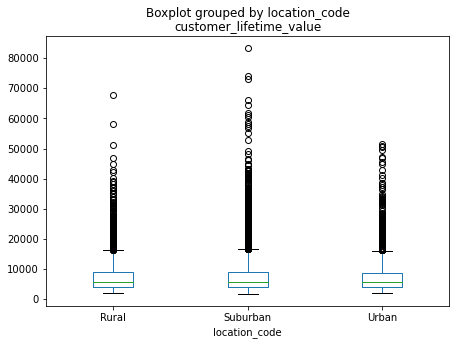

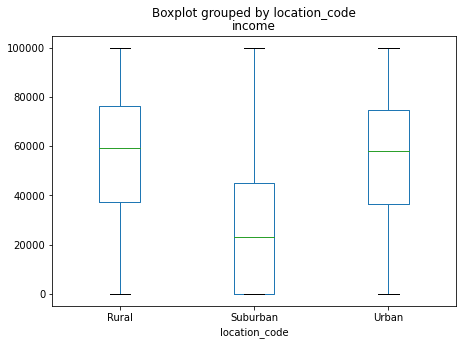

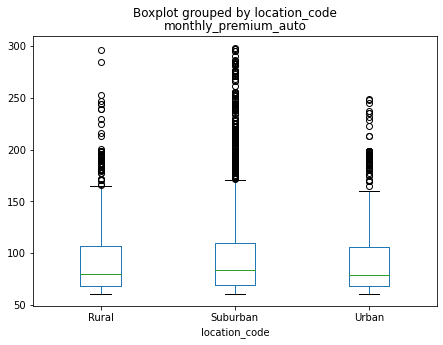

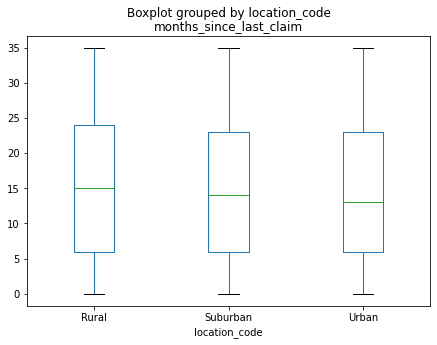

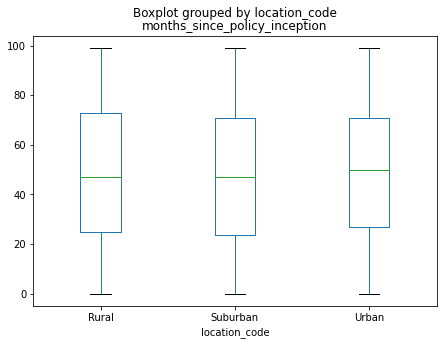

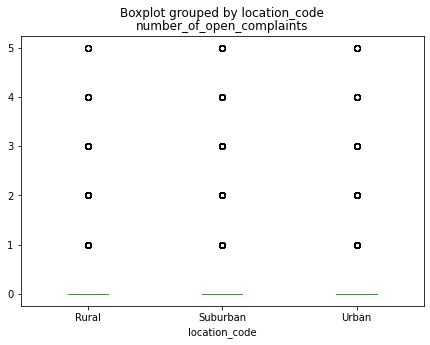

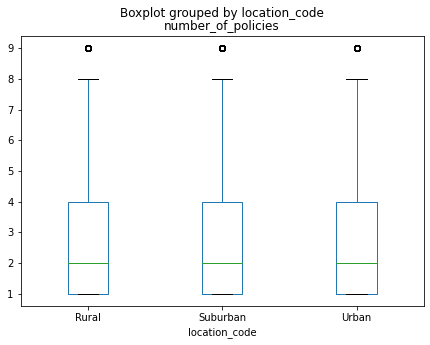

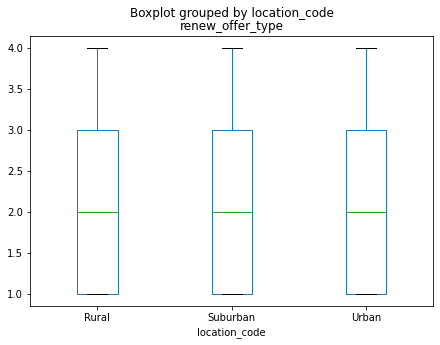

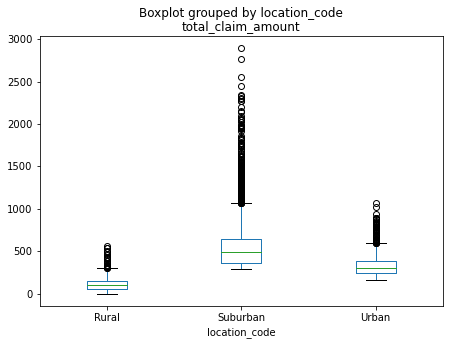

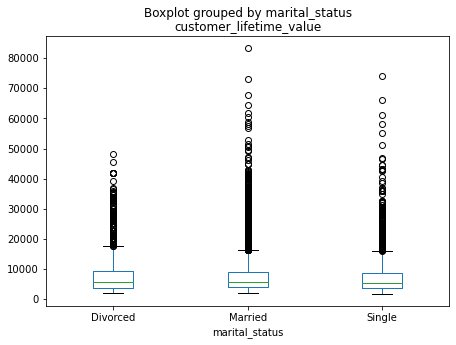

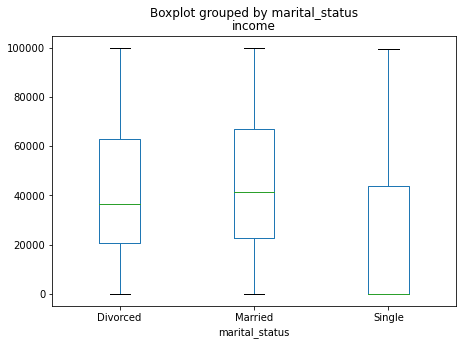

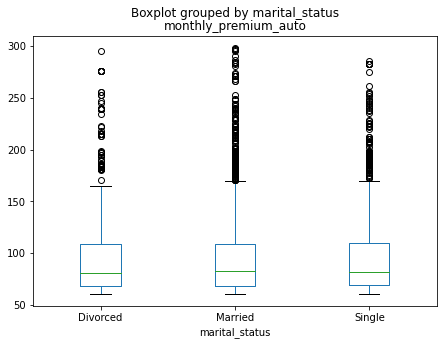

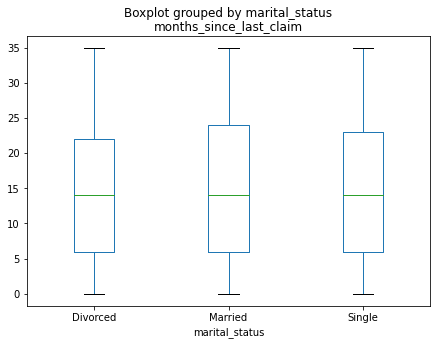

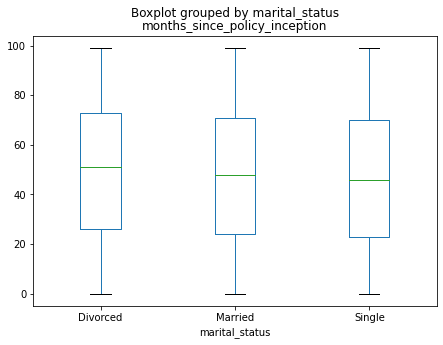

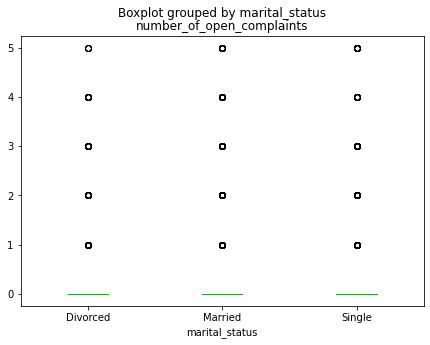

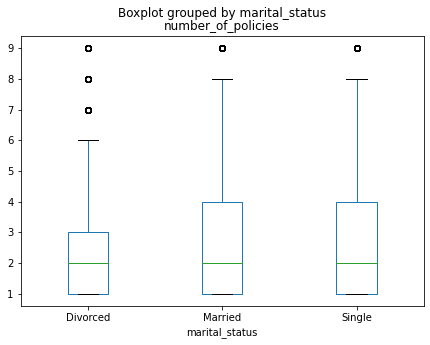

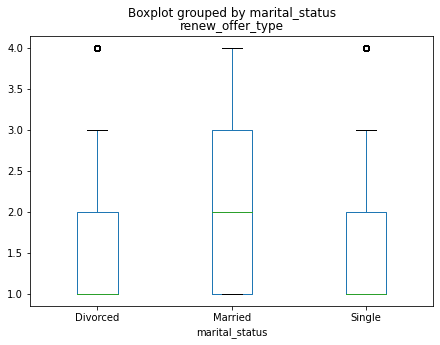

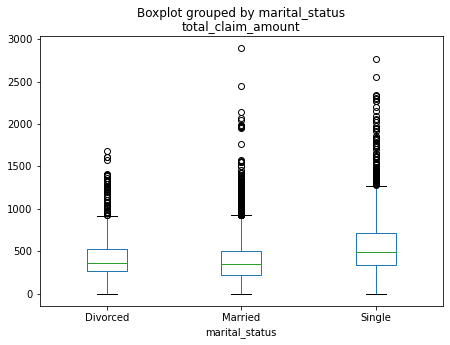

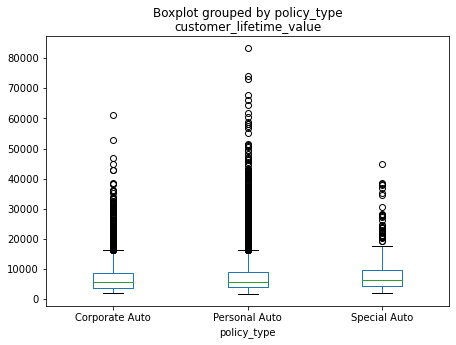

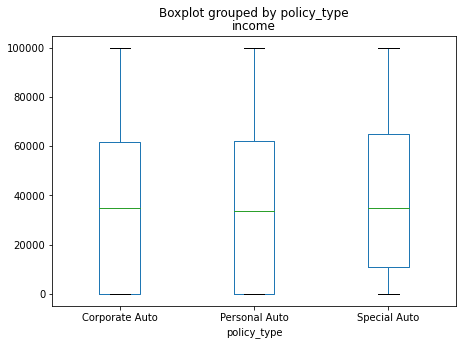

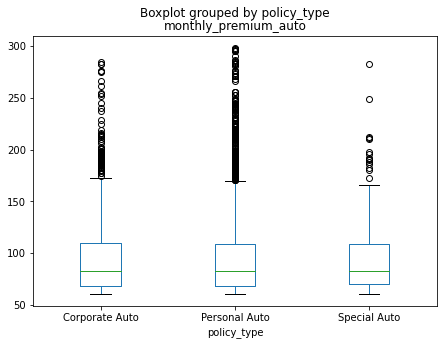

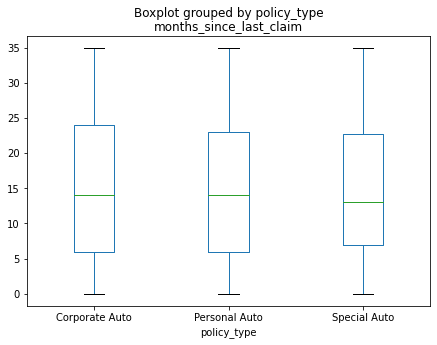

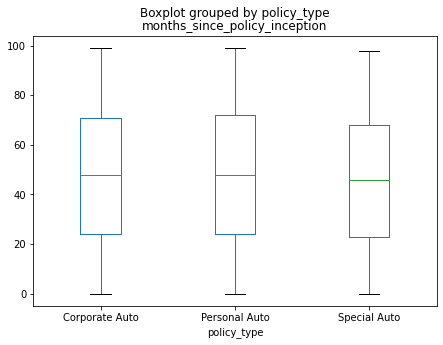

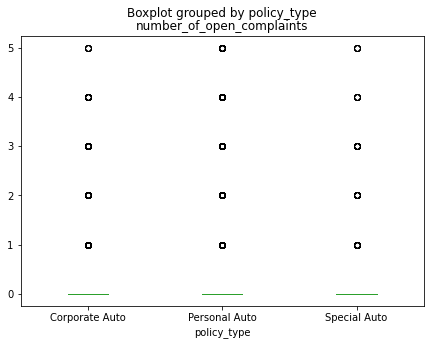

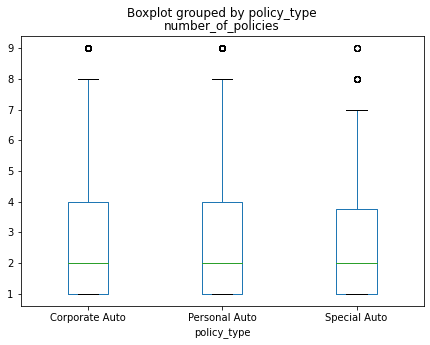

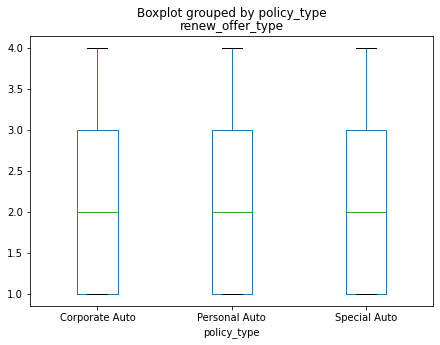

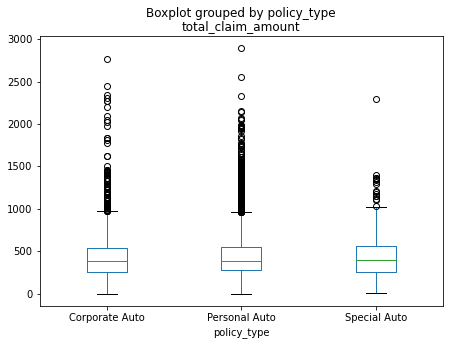

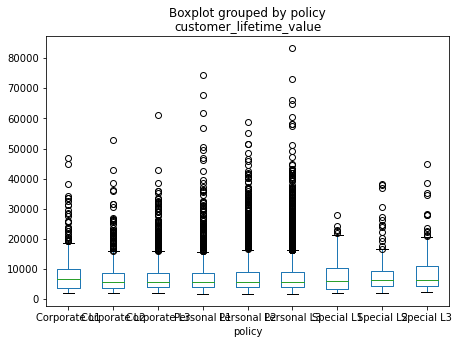

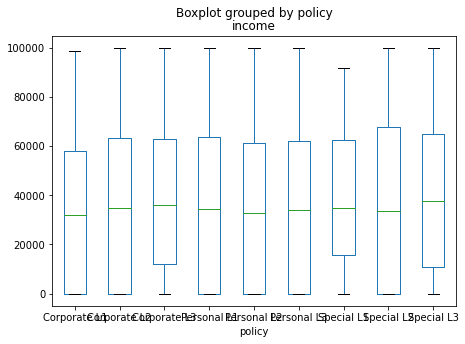

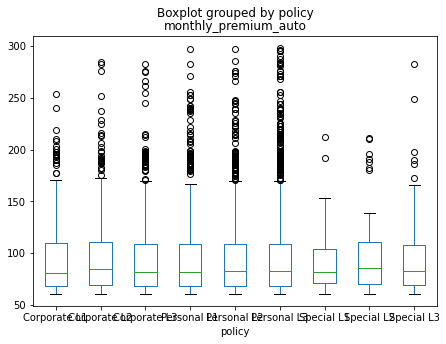

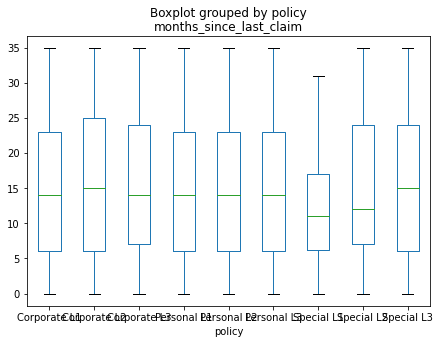

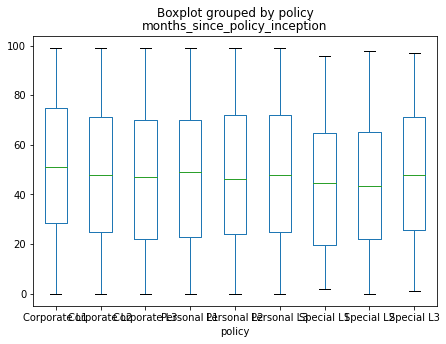

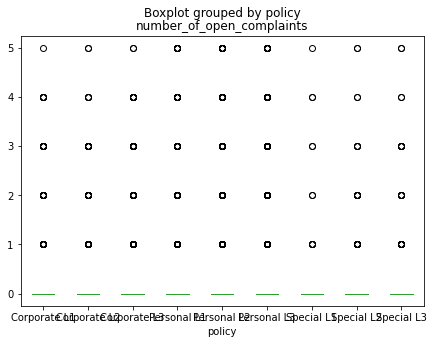

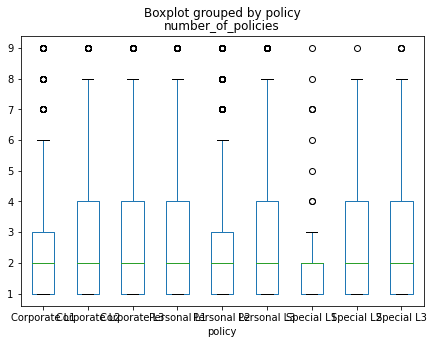

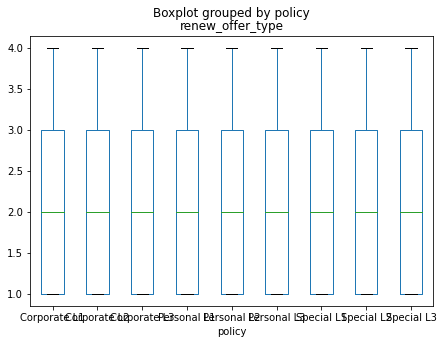

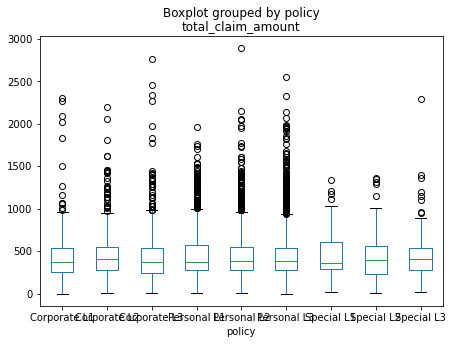

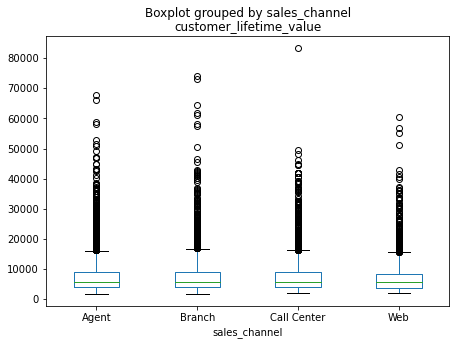

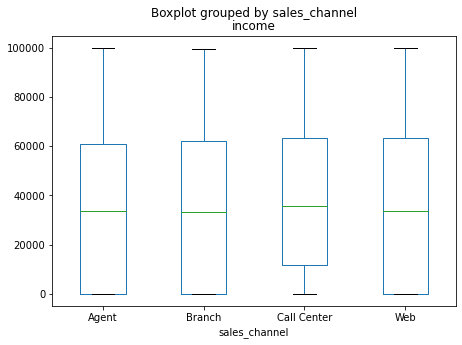

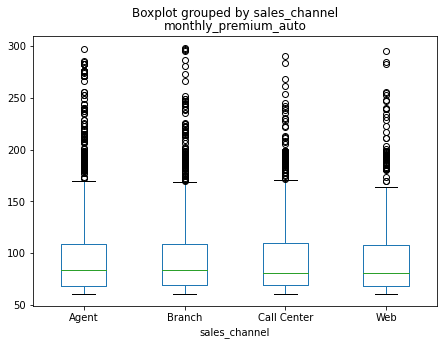

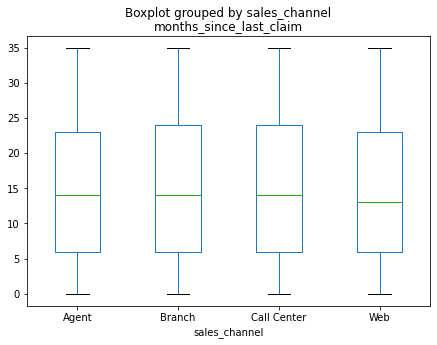

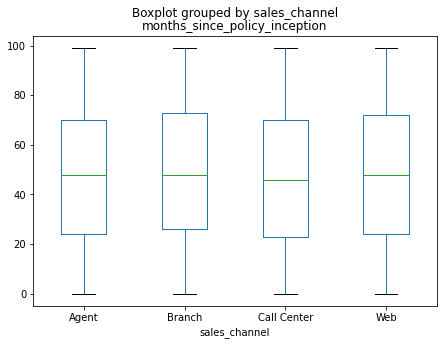

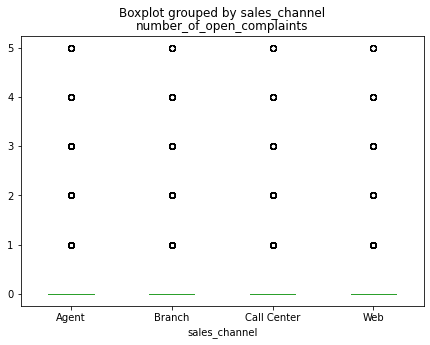

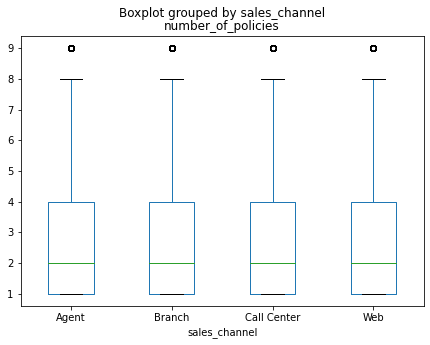

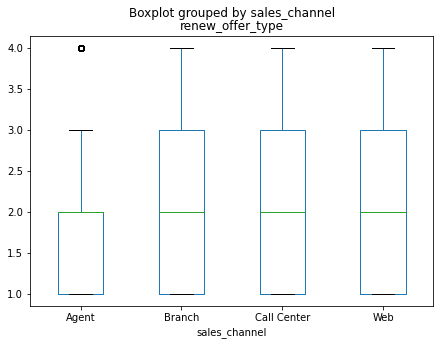

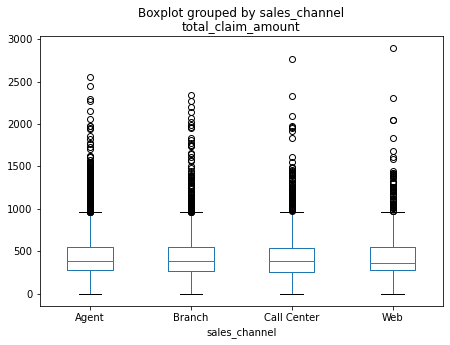

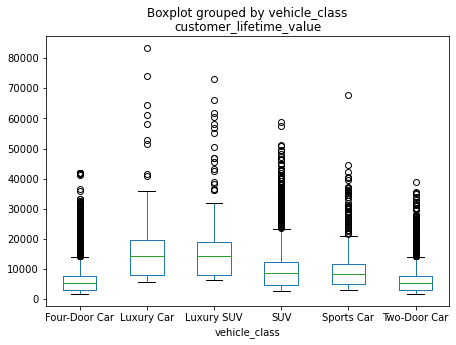

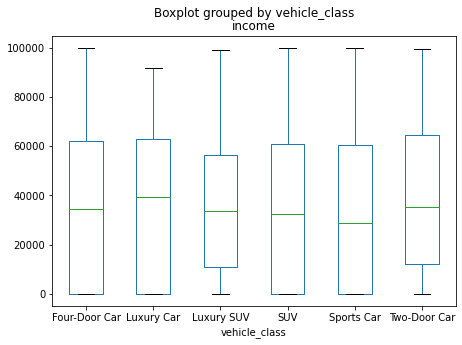

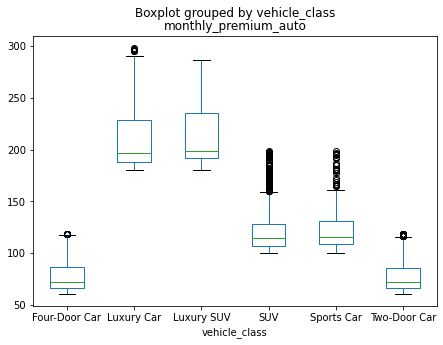

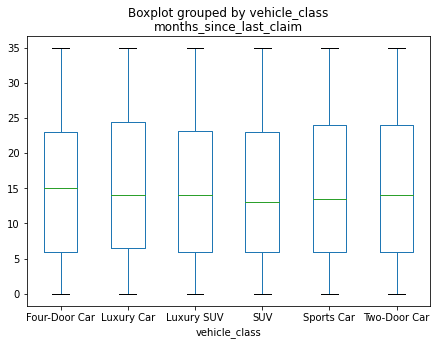

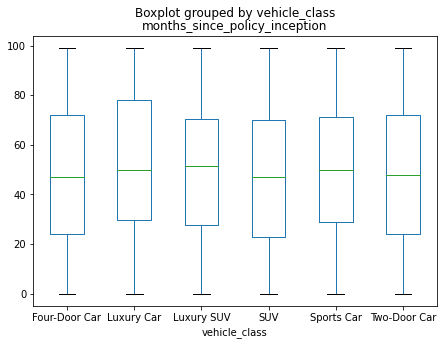

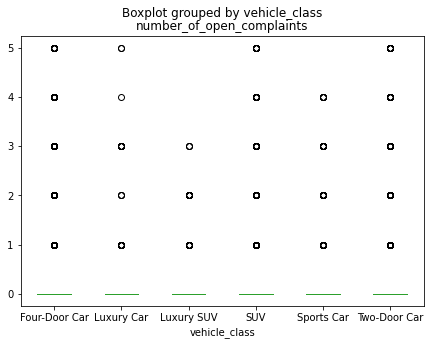

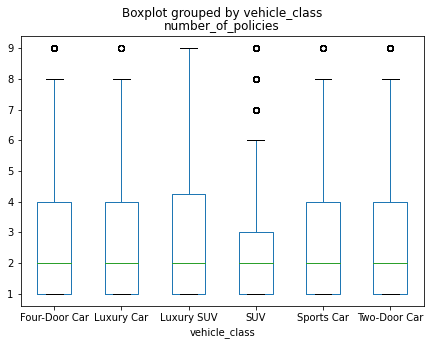

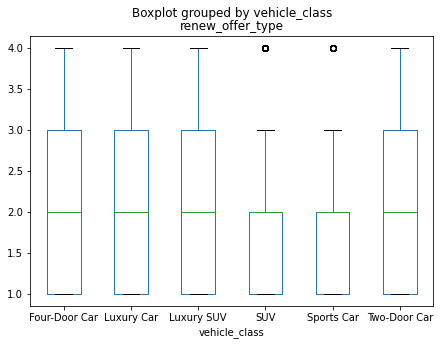

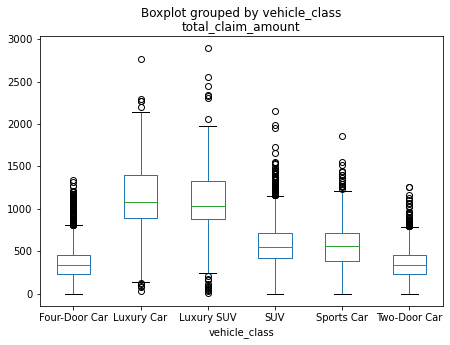

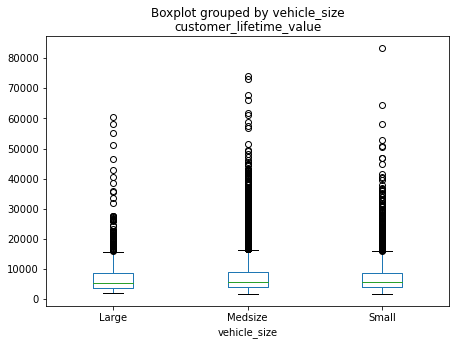

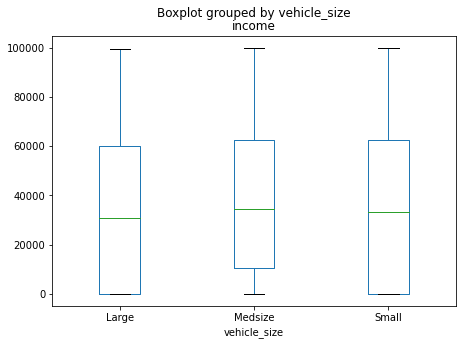

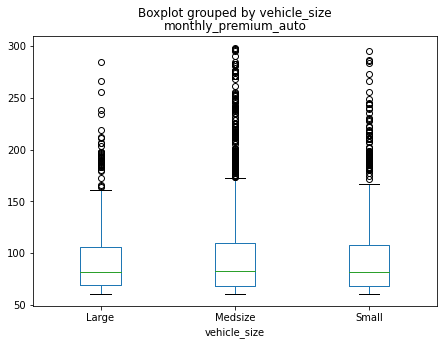

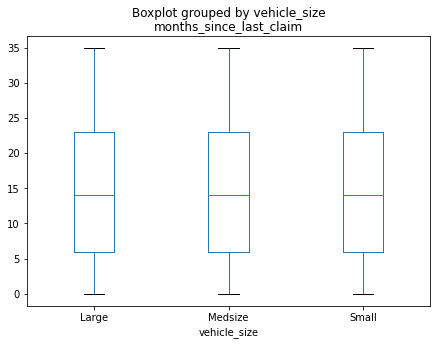

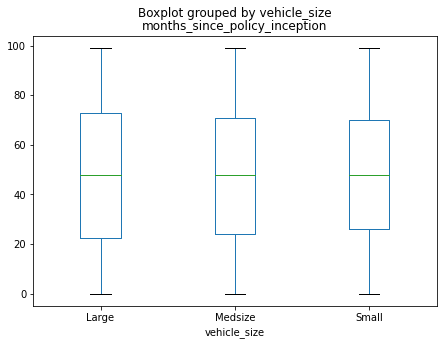

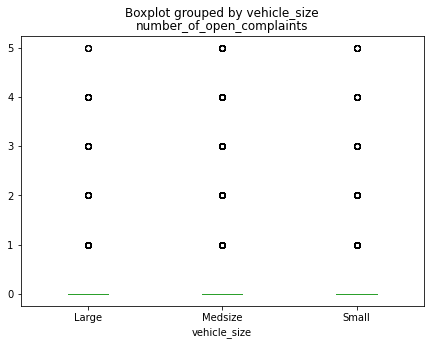

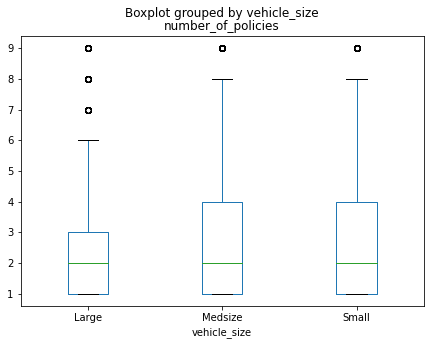

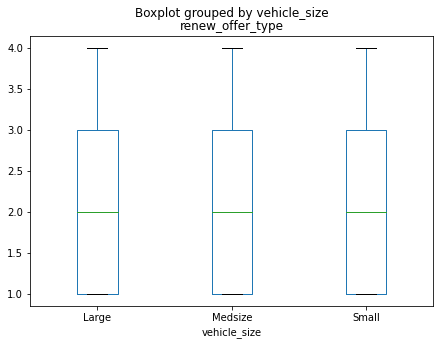

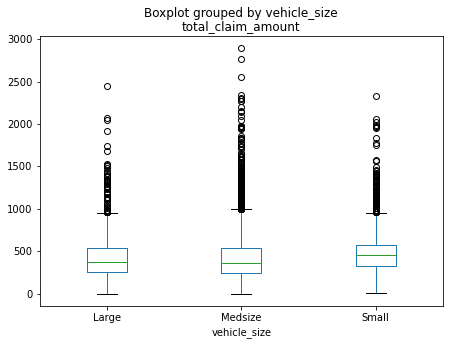

In [18]:
for i in cat.columns:
    for j in num.columns:
        customer_df.boxplot(by = i, column = j, grid = False, figsize=(7,5))
        plt.show()

In this nested loop, we plot every continuous variable grouped by every categorical variable.
Some of these graphs are irrelevant since some pairs of cat x num don't make since to plot.
Like the number of complaints grouped by policy

Some graphs have no outliers and some have a lot. Some have little.

In the end, it's a simple way to plot a boxplot for every combinations and choose what graphs we find relevant to extract outliers from the main dataset.

# Checking for NaN's

# <center> Cleaning Categorical Data

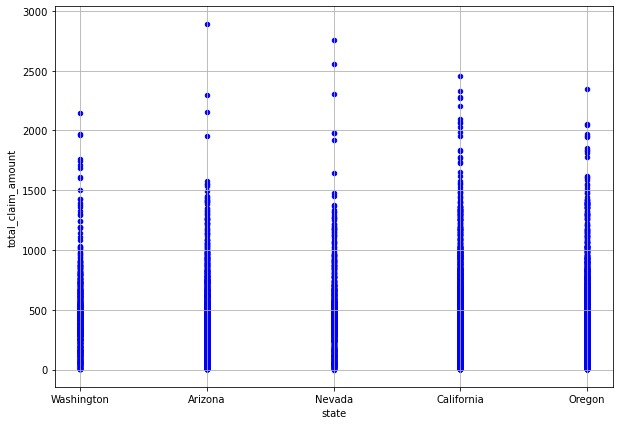

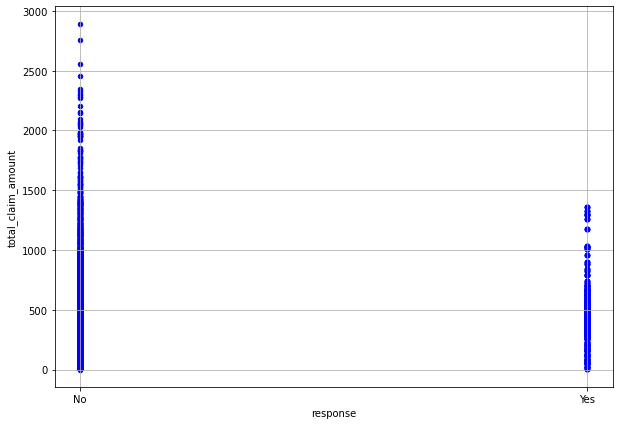

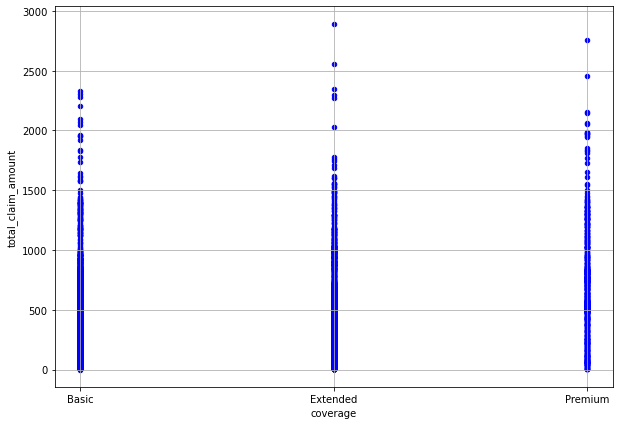

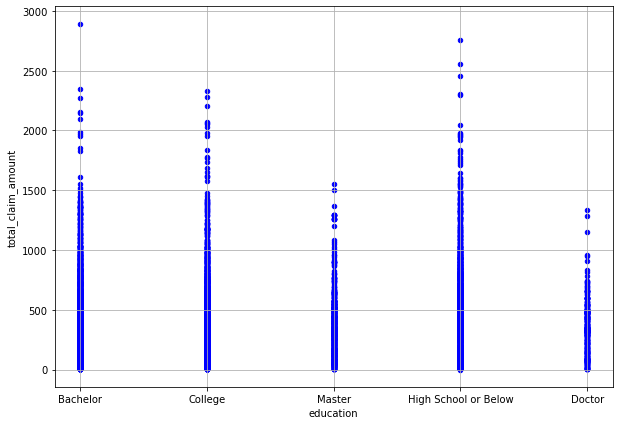

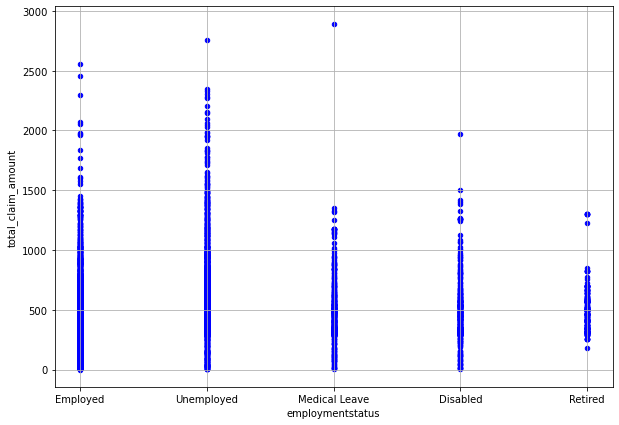

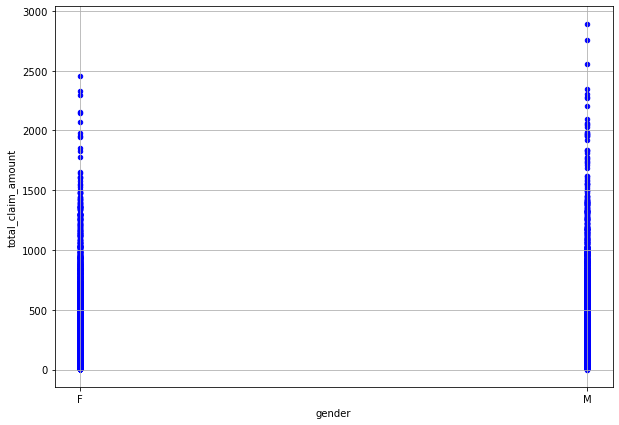

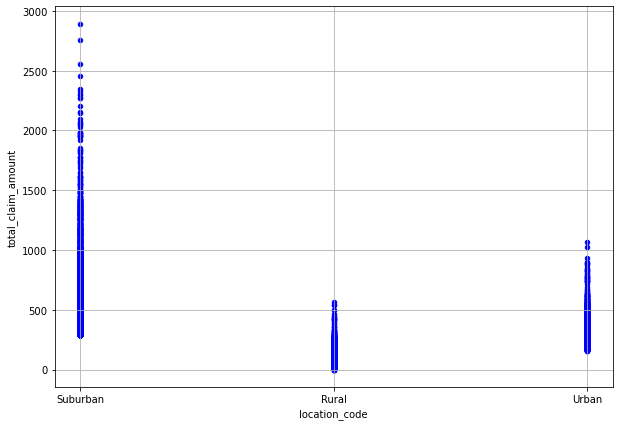

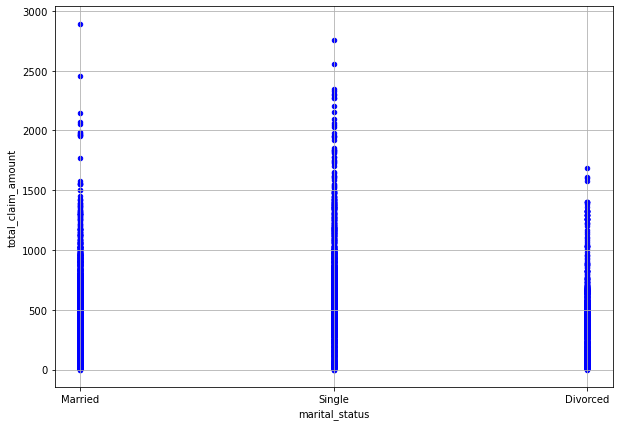

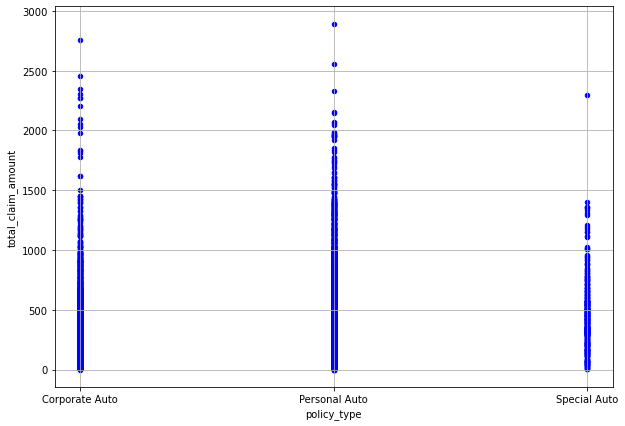

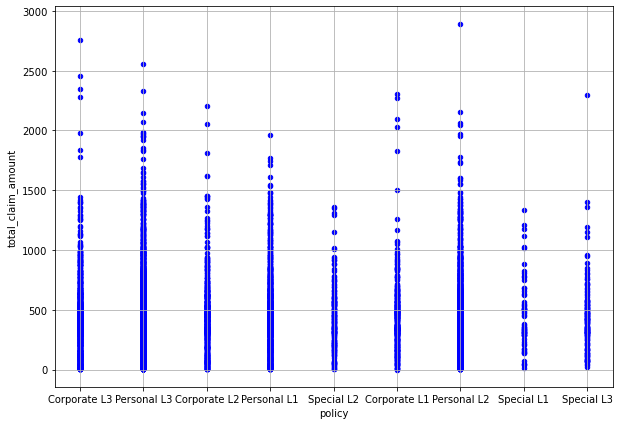

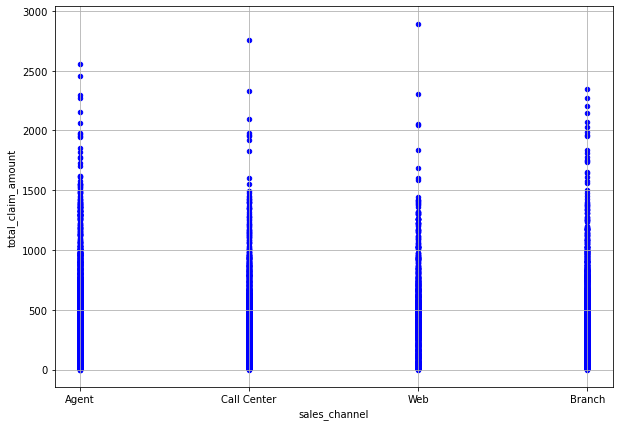

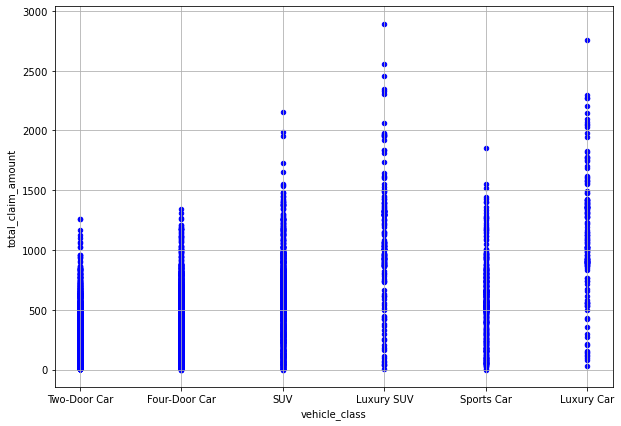

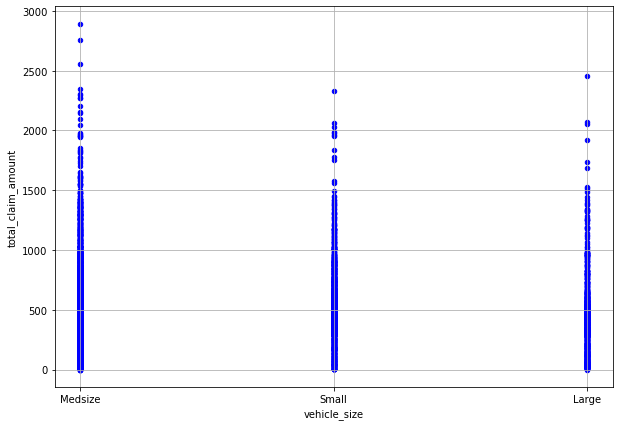

In [19]:
for column in cat.columns:
    customer_df.plot.scatter(x=column, y='total_claim_amount',color='b',figsize=(10,7),grid=True)
    plt.show()

This information might be use for cleaning because it can help us identify any imbalanced categories that might need to be addressed in order to build a more accurate model.

# <center> Feature Extraction

In [113]:
nunique={}
for column in cat:
    nunique[column] = cat[column].nunique()
nunique

{'state': 5,
 'response': 2,
 'coverage': 3,
 'education': 5,
 'employmentstatus': 5,
 'gender': 2,
 'location_code': 3,
 'marital_status': 3,
 'policy_type': 3,
 'policy': 9,
 'sales_channel': 4,
 'vehicle_class': 6,
 'vehicle_size': 3}

Some of the columns have the same amount of unique values. When this happens, this columns may be redundant.
To check if this is the case, we compare the values of the columns that have the same amount of unique values. In this case, we compared the values of all columns which was not needed, but it's safer.

In [120]:
column_names = cat.columns

for i in range(len(column_names)):
    for j in range(i+1, len(column_names)):
        if cat[column_names[i]].equals(cat[column_names[j]]):
            print(f'Columns {column_names[i]} and {column_names[j]} are redundant')
        else:
            print('not redundant')

not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not redundant
not re

We conclued that there's no redundant data in the categorical variables.

Here we can visualize the number of unique values per column and what they are.

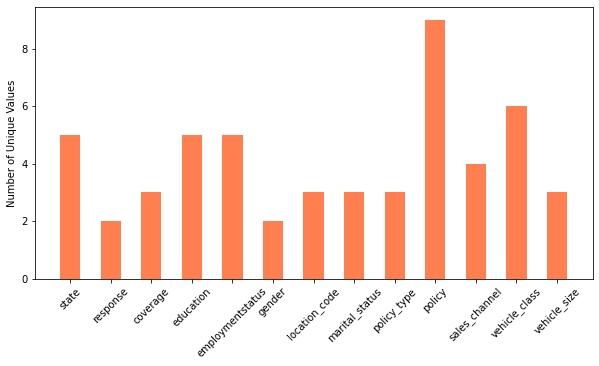

In [96]:
names = list(nunique.keys())
values = list(nunique.values())

plt.bar(range(len(nunique)), values, tick_label=names, width=0.5, color='coral')
plt.xticks(rotation = 45)
plt.ylabel('Number of Unique Values')
plt.show()

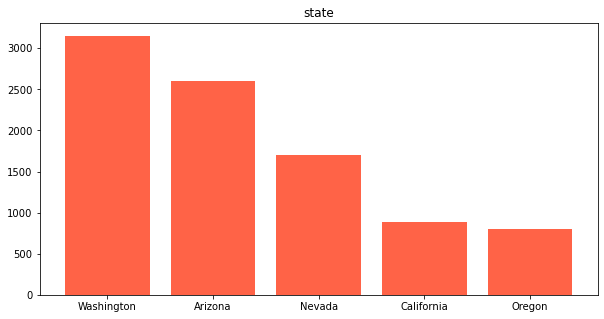

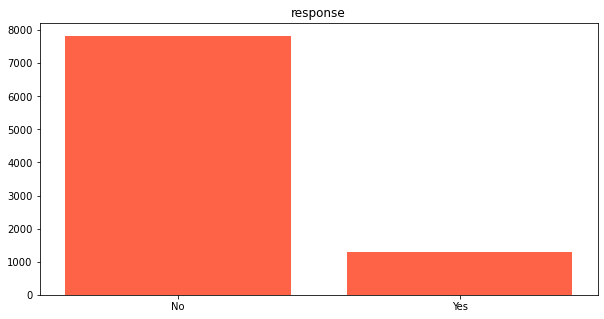

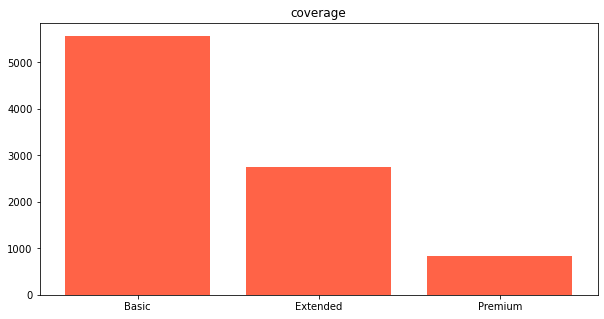

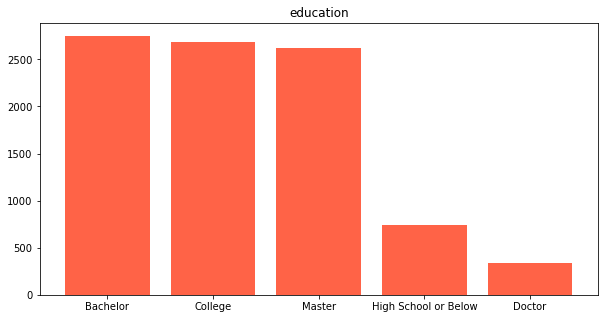

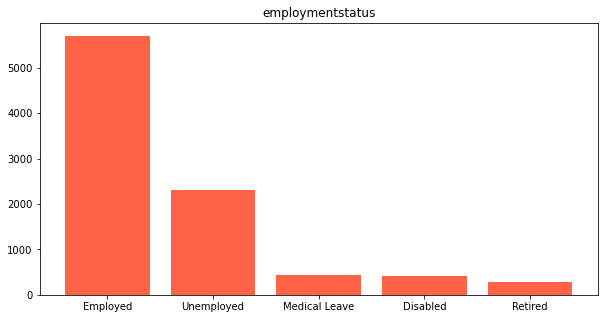

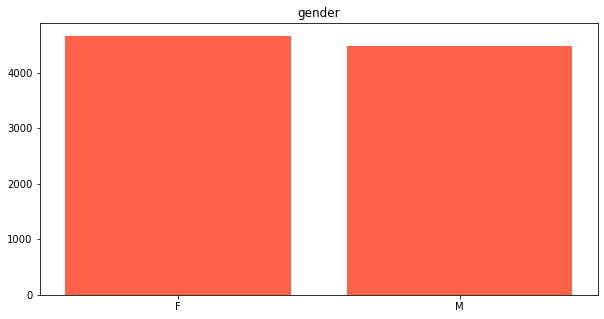

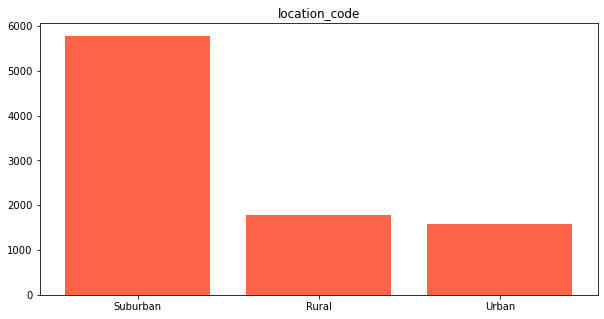

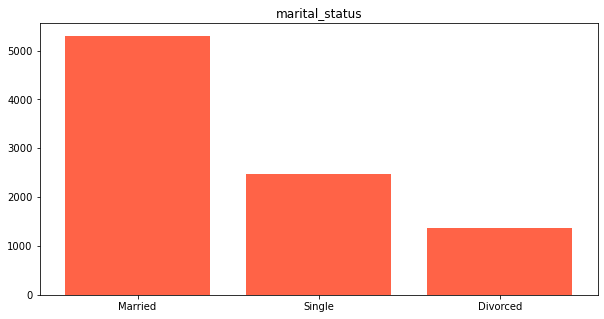

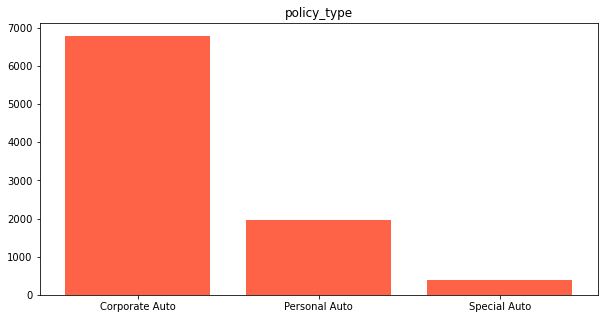

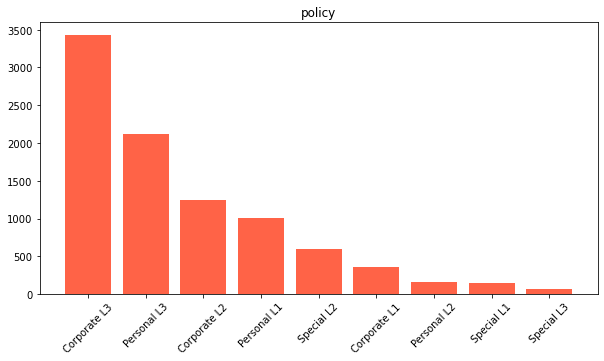

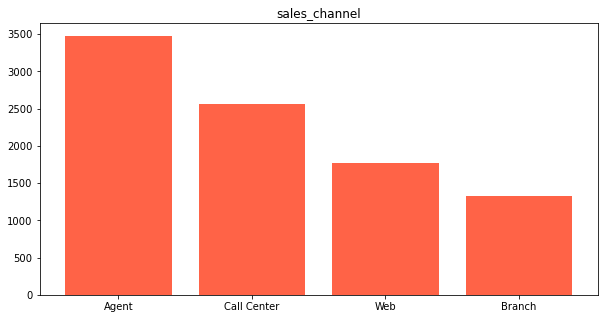

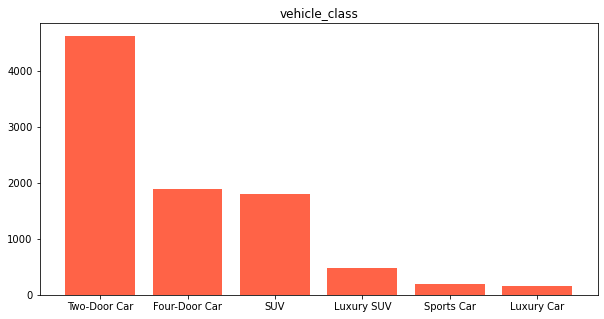

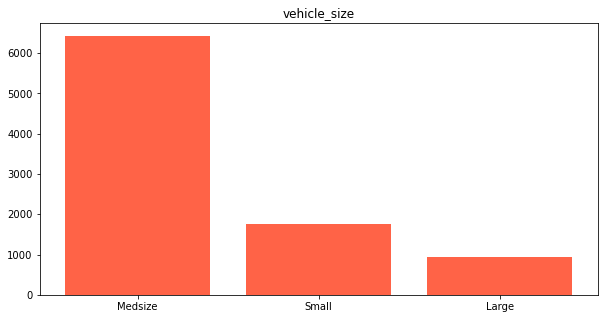

In [87]:
for column in cat.columns:
    if column == 'policy':
        plt.xticks(rotation = 45) 
    plt.title(column)
    plt.bar(cat[column].unique(),cat[column].value_counts(), color='tomato')
    plt.show()

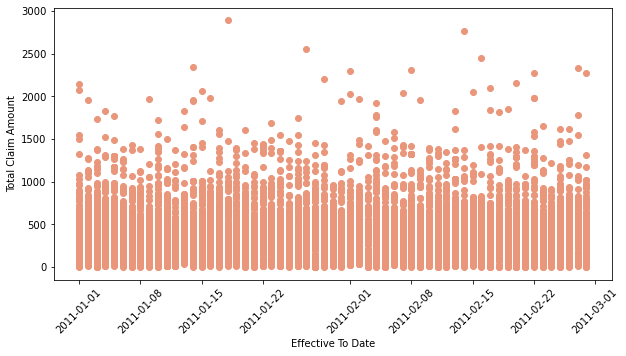

In [136]:
plt.scatter(customer_df['effective_to_date'], customer_df['total_claim_amount'],color='darksalmon')
plt.xlabel('Effective To Date')
plt.ylabel('Total Claim Amount')
plt.xticks(rotation = 45)
plt.show()